# Creating our first PyTorch model

Până acuma în această secțiune am creat un set de date folosind formula de la regresia liniară, am împărțit setul de date în training set și test set și am creat o funcție prin care putem să vizualizăm aceste date. O să recreem din nou toți acești pași

In [16]:
# importing the libraries
import torch
import matplotlib.pyplot as plt

# creating the variables
start = 0
end = 1
step = 0.02

# creating 'known' parameters
weight = 0.7
bias = 0.3

# crating a tensor that represents the Features
X = torch.arange(start, end, step).unsqueeze(dim=1)

# creating the labes using linear regression formula
y = weight * X + bias

# splitting the data into train set and test set
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [2]:
# creating a plotting function using Matplotlib
def plot_predictions(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None,
        ):
    
    # creating a figure
    plt.figure(figsize=(10, 7))

    # plotting the training data in blue
    plt.scatter(train_data, train_labels, c="b", s=5, label="Training Data")

    # plotting the test data in green
    plt.scatter(test_data, test_labels, c="g", s=5, label="Test Data")

    # checking to see if we have predictions
    if predictions:
        # plotting the predictions in red
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

    # displaying the legend
    plt.legend()

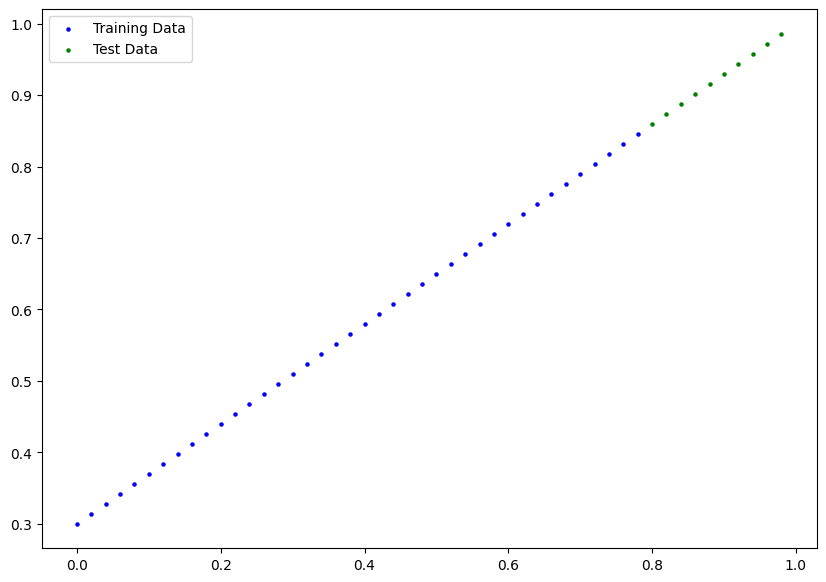

In [3]:
plot_predictions()

Acum urmează partea cea mai interesantă, cea în care o să creem un model folosind PyTorch. O să creem un model de Linear Regression. Pentru a putea crea un model folosind PyTorch, o să ne folosim de modulul `nn` din `torch` (`from torch import nn`). **nn** conține tot codul necesar din PyTorch pentru rețelele neuronale (nn = Neural Networks). Modelul pe care o să îl creem trebuie să aibă doi parametrii, un parametru pentru *weight* și unul pentru *bias* (notarea pe care am utilizat-o pentru parametrii din formula de Linear Regression). De asemenea, atunci când creem un model utilizând PyTorch trebuie să utilizăm clase, iar clasa respectivă o să moștenească clasa `nn.Module` (mai multe detalii aici -> https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Clasa pe care o să o creem acuma o să poarte denumirea de **LinearRegressionModel**

In [5]:
# importing the 'nn' module
from torch import nn

In [6]:
class LinearRegressionModel(nn.Module):
    pass

***nn.Module*** reprezintă clasa de bază pentru toate modele ce folosesc rețele neuronale din PyTorch. Această clasă are o mulțime de built-ins care ne ajută să ne creem un model, iar orice model care este creat ar trebuie să moștenească această clasă de bază.

Ca și metodă de lucru, o să ne creem un constructor în această clasă creată (metoda int__()) și de asemnea trebuie să moștenim și metoda init de la clasa pe care am moștenit-o (acest lucru se face prin utilzare constructorului `super()`)

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()


Acum că am creat constructorul pentru acestă clasă, trebuie să ne ocupăm de parametrii acestui model. După cum spuneam, modelul cu care o să lucrăm acuma o să aibă nevoie de doi parametrii, unul pentru **weight** și unul pentru **bias**. Acești parametrii o să îi creem ca și atribute pentru model (adică folosind *self*) și o să ne folosim de `nn.Parameter()` pentru a îi crea.  'A kind of Tensor that is to be considered a module parameter', aceasta este definiția de la Parameter din PyTorch (mai multe detalii aici -> https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html). Un **Parametru** este un 'tip/fel' de Tensor din PyTorch care este considerat ca și parametru pentru model. Pentru parametrii acestui model o să creem o valoare random (o singură valoare) folosinf **torch.randn()** (deoarece am spus că un model din Deep Learning începe cu valori random și după le tot modifică în funcție de datele de antrenare).

O să creem prima dată parametrul pentru **weight**

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__int__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

Atunci când creem un Parametru o să îi mai adăugăm și parametrul de ***requires_grad=True*** (care deși în mode default este setat cu valoarea 'True'). Acest parametru specifică dacă are nevoie de 'gradient' sau nu. O să vedem ce este acest gradient, momenta o să lăsăm codul așa, să știm doar că este ceva necesar să specificăm atunci când creem un Parametru. O să creem încă un *Parametru* și pentru 'bias'

In [13]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))

Acum avem cei doi parametrii de care am zis că are nevoie acest model. Modelul mai are nevoie de o funcție denumuită `forward()`, funcție care ia ca și argument un set de date sub formă de tensor și returenază tot un tensor. Această metodă definește computația care să se realizeze în model (ăn cazul nostru, computația care trebuie realizată este reprezentată de formula regresiei liniare: weight * X + bias). O să creem acuma această metodă.

In [15]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

Dacă ne uităm la secțiunea unde am creat datele cu care lucrăm, putem vedea că atunci când am creat formula de Linear Regression ca să calculăm y am folosit doi parametrii cu valori cunoscute (**'known' parameters**)

In [17]:
# creating 'known' parameters
weight = 0.7
bias = 0.3

y = weight * X + bias

Ce am făcut noi în cadrul modelului pe care l-am creat, am creat doi Parametrii, unul pentru 'weight' și unul pentru 'bias', parametrii pe care i-am creat cu valori random (o valaore random între 0 și 1), iar spre deosebire atunci când ne-am creat datele, am știu ce valori au acești parametrii (weight=0.7, bias=0.3). Scopul modelului este să înceapă cu valori random în tensori, să se uite la datele de antrenare și să facă un update la acele numere random astfel încât să reprezinte acel pattern care există în date între X și y (relația care există). Dacă modelul nostru o să învețe corect, atunci el o să ia acele valori random din Parametrii, o să le treacă prin metoda 'forward' și o să ajusteze valorile parametrilor astfel încât să ajungă cât mai aproape de valorile reale ale parametrilor (pe care modelul nu le cunoaște. Aici ne referim la acei 'known' parameters definiți când am utilizat formula de Linear Regression). Cum anume face acest lucru modelul? Prin două metode care poartă denumirea de `Gradient Descent` și `Backpropagation`

Ce face modelul?

- Începe cu valori random pentru Parametrii de 'weight' și 'bias'

- Se uită la datele de antrenare și ajustează valorile random pentru o reprezentare cât mai bună (cât mai apropiată) de valorile reale (valorile de la 'weight' și 'bias' pe care le-am folosit pentru a crea setul de date)

Cum face asta modelul? Prin două metode

1. Gradient Descent

2. Backpropagation

Metoda de 'Gradient Descent' este metoda care ne face să utilizăm valoarea de True pentru argumentul 'requires_grad' atunci când am creat Parametrii modelului. Atunci când o să realizăm partea de computații pentru model, acesta o să țintă cont de gradienții Parametrilor 'weight' și 'bias' și o să le updateze printr-o combinație de Gradient Descent și Backpropagation. Acele două metode sunt implementate în PyTorch, noi doar trebuie să specificăm să le folosească (de acolo și 'requires_grad=True').

Ce mai trebuie să menționăm este faptul că momentan lucrăm un set de date pe care l-am creat de la 0, de aceea avem și cei 'known' parameters. În cele mai multe scenarii (sau aproape toate) o să lucrăm cu un set de date deja existent (unde nu cunoaștem acei parametrii), nu o să ne definim noi Parametrii modelului, ci un alt modul din `nn` o să definească automat acești parametri pentru noi și o să stabilim ce valori ar trebui să aibă acei parametrii. Mai jos o să fie o eplicați pentru codul pe care l-am creat

<img src='../SS/Section_02_image_02.png' width=1200>

## Recapitulare

În secțiunea curentă am creat primul model utilizând PyTorch

1. Pentru a crea un model de PyTorch trebuie să utilizăm modulul `nn` din PyTorch

```python
from torch import nn
```

2. Ca să creem un model, trebuie să creem o clasă ce moștenește `nn.Module`

```python
class LinearRegressionModel(nn.Module):
    pass
```

3. În cadrul clasei o să ne creem constructorul care trebuie să moștenească și constructorul din clasa moștenită

```python
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

```

4. Pentru a crea Parametrii pentru Modelul respectiv o să ne folosim de `nn.Parameter()` care are nevoie de un tensor ca și date. De asemenea o să specificăm faptul că dorim să utilizeze ca și tip de date 'torch.float32' și de asemnea dorim să utilizeze și un gradient (requires_grad=True)

```python
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
```

5. Partea de computație se realizează în metoda 'forward()', metodă care trebuie să fie prezentă în fiecare model creat utilizând PyTorch

```python
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

```